In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

sns.set_style('darkgrid')

# Data Preparation 

In [175]:
# Data extraction.  
edu_df = pd.read_csv('hdi-full.csv', index_col=0)

In [176]:
# Keep columns with at least 161 non-null values. 
edu_df = edu_df.dropna(axis=1, thresh=161)
edu_df.shape

(195, 612)

In [177]:
# Keep rows with at least 607 non-null values.
edu_df = edu_df.dropna(axis=0, thresh=607)
edu_df.shape

(145, 612)

At this point, we've removed columns with more than 34 null values, and then removed all rows with more than 5 null values.

In [178]:
# The null values in each column. 
edu_df.isnull().sum().sort_values(ascending=True)

Country                                          0
Gross National Income Per Capita, male (2004)    0
Gross National Income Per Capita, male (2005)    0
Gross National Income Per Capita, male (2006)    0
Gross National Income Per Capita, male (2007)    0
                                                ..
Inequality in eduation (2017)                    3
Expected Years of Schooling, female (2000)       3
Inequality in eduation (2015)                    5
Inequality in eduation (2014)                    5
Inequality in eduation (2013)                    7
Length: 612, dtype: int64

In [179]:
# The null values in each row.
print(dict(edu_df.isnull().sum(axis=1).sort_values(ascending=False)))

{'TTO': 5, 'MAR': 5, 'MDV': 5, 'NIC': 4, 'BRA': 4, 'MMR': 4, 'PNG': 3, 'LKA': 3, 'ARE': 3, 'AGO': 2, 'PER': 2, 'FJI': 2, 'TON': 2, 'ESP': 1, 'NAM': 1, 'PRT': 1, 'MLT': 0, 'MLI': 0, 'LSO': 0, 'LTU': 0, 'PAN': 0, 'PAK': 0, 'LUX': 0, 'OMN': 0, 'NZL': 0, 'NPL': 0, 'NOR': 0, 'NLD': 0, 'LVA': 0, 'NER': 0, 'MDA': 0, 'MYS': 0, 'MWI': 0, 'MUS': 0, 'MRT': 0, 'MOZ': 0, 'PHL': 0, 'MDG': 0, 'MEX': 0, 'MNG': 0, 'AFG': 0, 'POL': 0, 'URY': 0, 'TJK': 0, 'TUN': 0, 'TUR': 0, 'TZA': 0, 'UGA': 0, 'UKR': 0, 'USA': 0, 'LAO': 0, 'UZB': 0, 'VEN': 0, 'VNM': 0, 'YEM': 0, 'ZAF': 0, 'ZMB': 0, 'THA': 0, 'TGO': 0, 'TCD': 0, 'SWZ': 0, 'SWE': 0, 'SVK': 0, 'STP': 0, 'SLV': 0, 'SLE': 0, 'SGP': 0, 'SEN': 0, 'SDN': 0, 'SAU': 0, 'RWA': 0, 'ROU': 0, 'QAT': 0, 'PRY': 0, 'LCA': 0, 'KHM': 0, 'KWT': 0, 'CIV': 0, 'BWA': 0, 'CAF': 0, 'CAN': 0, 'CHE': 0, 'CHL': 0, 'CHN': 0, 'CMR': 0, 'DEU': 0, 'COD': 0, 'COG': 0, 'COL': 0, 'CRI': 0, 'CUB': 0, 'CYP': 0, 'BRB': 0, 'BOL': 0, 'BLZ': 0, 'BLR': 0, 'BHR': 0, 'BGR': 0, 'BGD': 0, 'BFA': 0,

Above, we're looking at the prescence of null values in our data, before we use basic imputation.

In [180]:
# Basic imputation. 
edu_df = edu_df.fillna(edu_df.mean(numeric_only=True))

In [181]:
# The null values in each row.
print(dict(edu_df.isnull().sum(axis=1).sort_values(ascending=False)))

{'AFG': 0, 'KOR': 0, 'MUS': 0, 'MWI': 0, 'MYS': 0, 'NAM': 0, 'NER': 0, 'NIC': 0, 'NLD': 0, 'NOR': 0, 'NPL': 0, 'NZL': 0, 'OMN': 0, 'PAK': 0, 'PAN': 0, 'PER': 0, 'PHL': 0, 'MRT': 0, 'MOZ': 0, 'MNG': 0, 'LVA': 0, 'LAO': 0, 'LCA': 0, 'LKA': 0, 'LSO': 0, 'LTU': 0, 'LUX': 0, 'MAR': 0, 'MMR': 0, 'MDA': 0, 'MDG': 0, 'MDV': 0, 'MEX': 0, 'MLI': 0, 'MLT': 0, 'PNG': 0, 'POL': 0, 'PRT': 0, 'URY': 0, 'TTO': 0, 'TUN': 0, 'TUR': 0, 'TZA': 0, 'UGA': 0, 'UKR': 0, 'USA': 0, 'TJK': 0, 'UZB': 0, 'VEN': 0, 'VNM': 0, 'YEM': 0, 'ZAF': 0, 'ZMB': 0, 'TON': 0, 'THA': 0, 'PRY': 0, 'SGP': 0, 'QAT': 0, 'ROU': 0, 'RWA': 0, 'SAU': 0, 'SDN': 0, 'SEN': 0, 'SLE': 0, 'TGO': 0, 'SLV': 0, 'STP': 0, 'SVK': 0, 'SWE': 0, 'SWZ': 0, 'TCD': 0, 'KWT': 0, 'KHM': 0, 'AGO': 0, 'KGZ': 0, 'BRB': 0, 'BWA': 0, 'CAF': 0, 'CAN': 0, 'CHE': 0, 'CHL': 0, 'CHN': 0, 'CIV': 0, 'CMR': 0, 'COD': 0, 'COG': 0, 'COL': 0, 'CRI': 0, 'CUB': 0, 'CYP': 0, 'BRA': 0, 'BOL': 0, 'BLZ': 0, 'AZE': 0, 'ALB': 0, 'ARE': 0, 'ARG': 0, 'ARM': 0, 'AUS': 0, 'AUT': 0,

After performing basic column-mean imputation, we observe that we have fully cleaned the dataset.

In [182]:
# Encoding an ordinal categorical variable.
scale_mapper = {"Low" : 1, 
                "Medium" : 2, 
                "High" : 3, 
                "Very High" : 4}
edu_df["Human Development Groups"] = edu_df["Human Development Groups"].replace(scale_mapper)

Since we have an ordinal, categorical feature in our dataset, we have to encode it.

In [183]:
# The columns we don't want to include as features.
removals = ["Country", "UNDP Developing Regions"]
for i in range(1990, 2022):
    removals.append("Human Development Index (" + str(i) + ")")
    removals.append("HDI male (" + str(i) + ")")
    removals.append("HDI female (" + str(i) + ")")
    removals.append("Expected Years of Schooling, female (" + str(i) + ")")
    removals.append("Expected Years of Schooling, male (" + str(i) + ")")
    removals.append("Expected Years of Schooling (" + str(i) + ")")
    removals.append("Mean Years of Schooling, female (" + str(i) + ")")
    removals.append("Mean Years of Schooling, male (" + str(i) + ")")
    removals.append("Mean Years of Schooling (" + str(i) + ")")
    removals.append("Planetary pressures-adjusted Human Development Index (" + str(i) + ")")
    removals.append("HDI Rank (" + str(i) + ")")

We need to reduce the number of features in our dataset, so we begin by looking at features that are inherently coupled with our target. For example, we remove all the features that have to do with years of schooling. We also remove any metrics of HDI, as it's not an interesting observation to say that HDI greatly impacts schooling, since "increasing HDI" is not actionable.

In [184]:
correlations = dict()
target = "Mean Years of Schooling, female (2021)"

for column in edu_df.columns:
    if column in removals:
        pass
    else:
        correlations[column] = edu_df[column].corr(edu_df[target])

correlations_list = []
for col, corr in correlations.items():
    correlations_list.append([col, corr])

# Selecting the 300 features that have the highest correlations.
features = [x[0] for x in sorted(correlations_list, key=lambda x: x[1])[:300]]

We end up choosing the 300 features that have the highest correlations with our target.

# Preliminary Analysis

In this section, we perform some analysis, so that we can better understand the data.

In [185]:
# Analyzing distribution of our target.
male = 'Mean Years of Schooling, male (2021)'
print("The standard deviation of the Mean Years of Schooling, female (2021) is {}".format(round(edu_df[target].std(), 2)))
print("The mean of the Mean Years of Schooling, female (2021) is {}".format(round(edu_df[target].mean(), 2)))
print("The standard deviation Mean Years of Schooling, male (2021) is {}".format(round(edu_df[male].std(), 2)))
print("The mean of the Mean Years of Schooling, male (2021) is {}".format(round(edu_df[male].mean(), 2)))

The standard deviation of the Mean Years of Schooling, female (2021) is 3.58
The mean of the Mean Years of Schooling, female (2021) is 8.81
The standard deviation Mean Years of Schooling, male (2021) is 3.03
The mean of the Mean Years of Schooling, male (2021) is 9.3


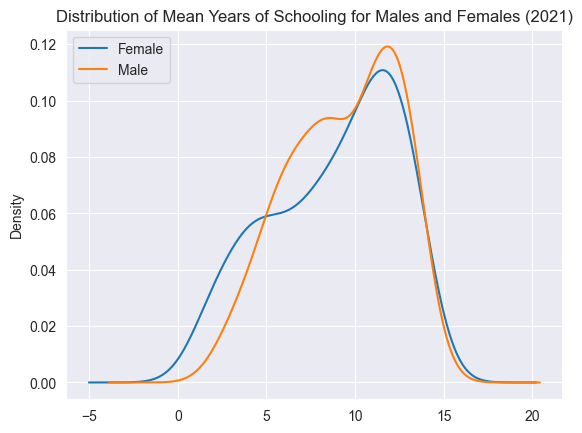

In [186]:
# Analyzing the distribution of males vs. females. 
edu_df[target].plot(kind='kde', label="Female")
edu_df[male].plot(kind='kde', label="Male")
plt.title("Distribution of Mean Years of Schooling for Males and Females (2021)")
plt.legend(loc="upper left")
plt.show()

As we can see from our plots, the distribution for the mean years of schooling for both males and females have similar shapes. The standard deviation for males is less than the standard deviation for females and the mean for males is greater than the mean for females. We assume that the cause of this is the result of gender inequalities in different countries. However, because the shapes of their distributions are very similar, we can generalize the results of our model to males with a high level of confidence.

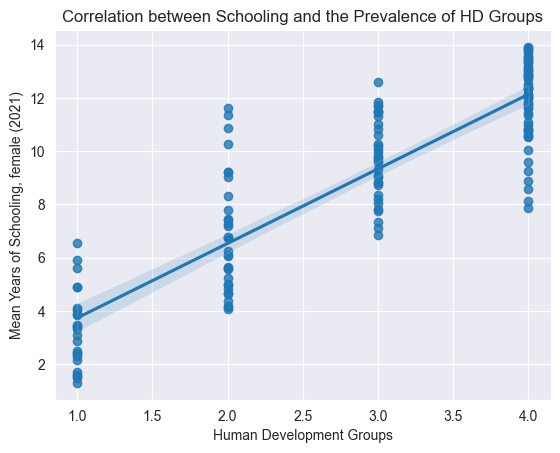

In [187]:
# Visualizing a potential correlation. 
sns.regplot(data=edu_df, x='Human Development Groups', y='Mean Years of Schooling, female (2021)')
plt.title("Correlation between Schooling and the Prevalence of HD Groups")
plt.show()

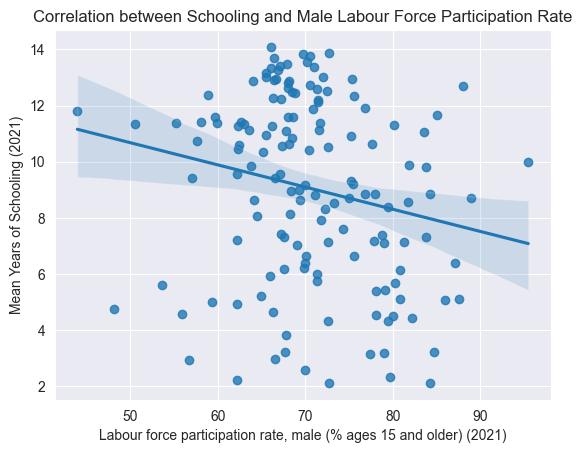

In [188]:
sns.regplot(data=edu_df, x='Labour force participation rate, male (% ages 15 and older) (2021)', y='Mean Years of Schooling (2021)')
plt.title("Correlation between Schooling and Male Labour Force Participation Rate")
plt.show()

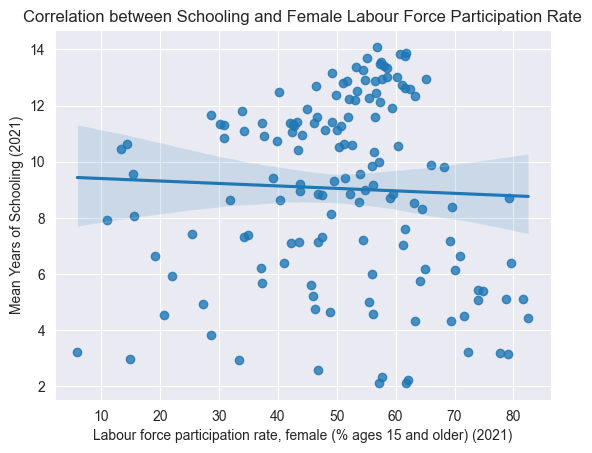

In [189]:
sns.regplot(data=edu_df, x='Labour force participation rate, female (% ages 15 and older) (2021)', y='Mean Years of Schooling (2021)')
plt.title("Correlation between Schooling and Female Labour Force Participation Rate")
plt.show()

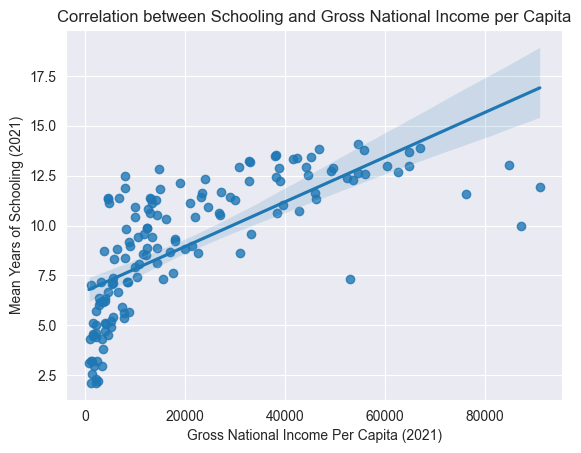

In [190]:
sns.regplot(data=edu_df, y='Mean Years of Schooling (2021)', x='Gross National Income Per Capita (2021)')
plt.title("Correlation between Schooling and Gross National Income per Capita")
plt.show()

Above, we visualization some correlations we thought might exist, just to get a better understanding of the dataset.

# Model Selection & Training

In [191]:
# Partitioning the data into test and train, using a 75/25 split.
X = edu_df[features]
y = edu_df[target]

X_train, X_test, y_train, y_test = train_test_split(X,  #the input features
                                                    y,  #the label
                                                    test_size=0.25,  #set aside 30% of the data as the test set
                                                    random_state=5  #reproduce the results
                                                    )

### K-Nearest Neighbors

In [192]:
# Testing our model without tuning.
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [193]:
# Predicting the labels for the test set.
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The STD of the target is: {}'.format(round(edu_df[target].std(), 2)))
print('The mse of the model is: {}'.format(round(mse, 2)))
print('The R-squared is: ', round(r2_score(y_test, y_pred), 2))

The STD of the target is: 3.58
The mse of the model is: 3.48
The R-squared is:  0.74


Above, we build a model with the default hyperparameters, to see improvement after tuning the hyperparameters. As you can see, the MSE is very high, almost equal to the standard deviation of our target.

In [194]:
# Finding the best k-value.
k_values = range(3, 50)
scores = []

best_mse = (float('inf'), -1)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    if mse <= best_mse[0]:
        best_mse = (mse, k)

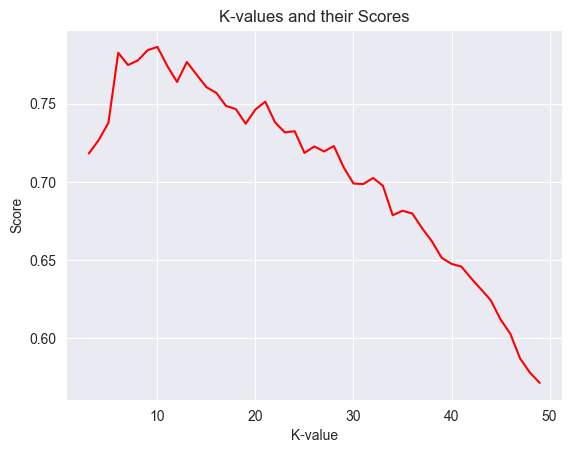

In [195]:
# Visualizing the different k-values and their scores.
x = np.array(k_values)
y = np.array(scores)

plt.title("K-values and their Scores")
plt.xlabel("K-value")
plt.ylabel("Score")
plt.plot(x, y, color="red")
plt.show()

In [196]:
# Explain the visualization.
print(f"The model with the best mse had a n_neighbors value of {best_mse[1]} with a mse of {(round(best_mse[0], 2))}.")

The model with the best mse had a n_neighbors value of 10 with a mse of 2.84.


The visualizations seems to indicate that the score drops as we increase the k-value. After tuning, we can see that the best n_neighbors value is 10. 

In [197]:
# Building our model with the best hyperparameters.
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [198]:
# Predicting the labels for the test set.
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The STD of the target is: {}'.format(round(edu_df[target].std(), 2)))
print('The mse of the model is: {}'.format(round(mse, 2)))
print('The R-squared is: ', round(r2_score(y_test, y_pred), 2))

The STD of the target is: 3.58
The mse of the model is: 2.84
The R-squared is:  0.79


We clearly improved after tuning... However, since our MSE is barely lower than the standard deviation of the target, we can come to the conclusion that our model is inaccurate. 

### Support Vector Machine

In [199]:
# Initialize our scaler, so we can normalize the numeric features. 
scaler = StandardScaler()
scaler.fit(X_train)

# Normalizing. 
X_train_scaled = scaler.transform(X_train)

# Scaling the test data.
X_test_scaled = scaler.transform(X_test)

In [200]:
# Building our model with the default hyperparamters.
svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [201]:
# Predicting the labels for the test set.
y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions.
print('The mse of the model is: {}'.format(round(mse, 2)))

The mse of the model is: 2.95


Before tuning the hyperparameters, notice that the MSE is just under 3.

In [202]:
# Try values of C ranging from 1 to 50 and different gamma. 
params = {'C': np.arange(1, 50),
         'gamma' : ["scale", "auto"]}

svr = SVR()

# Initialize Random Search with Cross Validation.
svr_grid = RandomizedSearchCV(estimator=svr, param_distributions=params, cv=5, verbose=1)
svr_grid.fit(X_train_scaled, y_train)

print(f"Best Params: {svr_grid.best_params_}")
print("Our best score is {}.".format(round(svr_grid.best_score_, 2)))

# Predicting the labels for the test set.
y_pred = svr_grid.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}.'.format(round(mse, 2)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params: {'gamma': 'scale', 'C': 16}
Our best score is 0.8.
The mse of the model is: 2.15.


In [203]:
# Building our model with the best params.
svr = SVR(C=12, gamma='scale')
svr.fit(X_train_scaled, y_train)

SVR(C=12)

In [204]:
# Predicting the labels for the test set.
y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The STD of the target is: {}'.format(round(edu_df[target].std(), 2)))
print('The mse of the model is: {}'.format(round(mse, 2)))
print('The R-squared is: ', round(r2_score(y_test, y_pred), 2))

The STD of the target is: 3.58
The mse of the model is: 2.13
The R-squared is:  0.84


Even though our MSE was reduced greatly after tuning, and our R-squared is good, the MSE is still too close to the standard deviation of our target. IE: This model is also too inaccurate.

### Random Forests

In [205]:
# Building our model with the default hyperparameters.
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [206]:
# Predicting the labels for the test set.
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions.
print('The STD of the target is: {}'.format(round(edu_df[target].std(), 2)))
print('The mse of the model is: {}'.format(round(mse, 2)))
print('The R-squared is: ', round(r2_score(y_test, y_pred), 2))

The STD of the target is: 3.58
The mse of the model is: 1.3
The R-squared is:  0.9


Before tuning the hyperparameters, our model seems to be pretty accurate.

In [207]:
# Uncomment to try tuning the hyperparameters.
# Setup the parameter grid to try values various values.
n_estimators = [5, 20]  # Number of trees.
max_features = [1.0]  # Number of features to consider at each split.
max_depth = np.arange(50, 70, 2)  # Maximum height of each decision tree.
min_samples_split = np.arange(2, 12, 1)  # Minimum sample number to split a node.
min_samples_leaf = np.arange(2, 10, 2)  # Minimum sample number that can be stored in a leaf node.
bootstrap = [True, False]  # Method used to sample data points.

params = {'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'bootstrap': bootstrap}

# Initialize Grid Search with Cross Validation.
rf = RandomForestRegressor(random_state=5)

rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=4, verbose=1, n_jobs=-1, return_train_score=True)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_)  #print the best parameters
print(round(rf_grid.best_score_, 2))  #print the best score

mse = mean_squared_error(y_test, rf_grid.predict(X_test))

# Evaluate the Predictions
print('The mse of the model is: {}'.format(round(mse, 2)))

Fitting 4 folds for each of 1600 candidates, totalling 6400 fits
{'bootstrap': True, 'max_depth': 50, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
0.86
The mse of the model is: 1.08


Here, we used GridSearchCV for hyperparameter tuning. We chose the parameters based of readings online, such as [this](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/) one. Please note that our parameter grid changed vastly throughout the process, and we only include the final version here. We commented it out, since it takes several minutes to run. 

In [208]:
# Building our model with the above best params.
rf = RandomForestRegressor(random_state=5, n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=1.0,
                           max_depth=50, bootstrap=True)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=2, n_estimators=20,
                      random_state=5)

In [209]:
# Predicting the labels for the test set.
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions.
print('The STD of the target is: {}'.format(round(edu_df[target].std(), 2)))
print('The mse of the model is: {}'.format(round(mse, 2)))
print('The R-squared is: ', round(r2_score(y_test, y_pred), 2))

The STD of the target is: 3.58
The mse of the model is: 1.08
The R-squared is:  0.92


We evaluate our model using the MSE and R2 metric. We can use STD of the target as a benchmark for our MSE, and as you see above, the MSE is significantly lower. The R2 also looks great, as it's measured on a scale of 0 to 1, and we are at 0.92. Notice the improvement from the previous step as well.

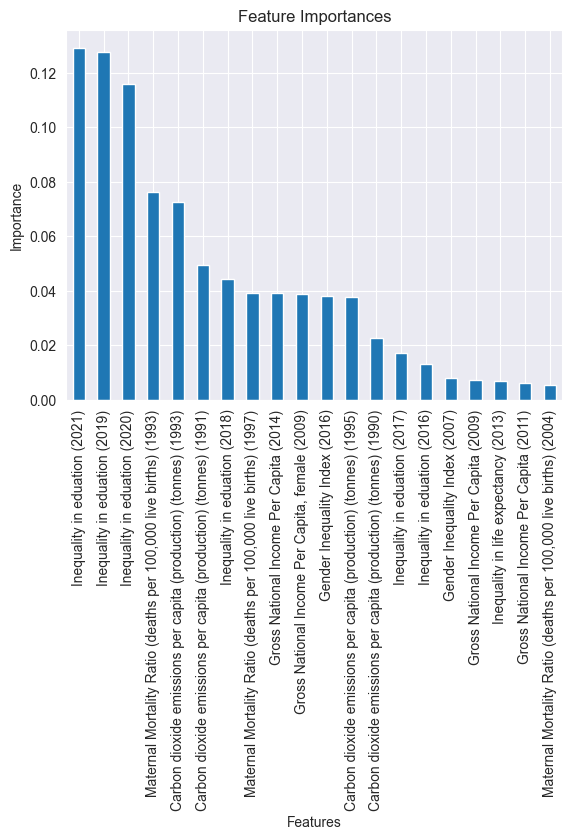

In [210]:
# Importances of the different features in our model.
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=features)

top_20 = forest_importances.sort_values(ascending=False)[:20]
fig, ax = plt.subplots()
top_20.plot.bar()
ax.set_title("Feature Importances")
ax.set_ylabel("Importance")
ax.set_xlabel("Features")
plt.show()

Here, we visualize the top twenty most important features.

In [211]:
# Evaluating the scores.
cv_results = pd.DataFrame(rf_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
481,0.975767,0.001438,0.863038,0.016659
485,0.975767,0.001438,0.863038,0.016659
483,0.975767,0.001438,0.863038,0.016659
241,0.975767,0.001438,0.863038,0.016659
85,0.975767,0.001438,0.863038,0.016659


The highest mean_train_score is 0.98 and the highest mean_test_score is 0.86. Since there is roughly a 0.1 discrepancy, our model appears to slightly overfit the data. This demonstrates some bias and some variance.

# Conclusion

Our random forests model performed the best by far, so we used it for our project. See our poster for more information!